In [1]:
CREDENTIALS = 'dsi-capstone-f19-group-1-d1fa043f65c5.json'
PROJECT_ID = 'dsi-capstone-f19-group-1'

In [2]:
import matplotlib.pyplot as plt
from google.cloud import bigquery
import networkx as nx

%load_ext google.cloud.bigquery
plt.style.use('fivethirtyeight')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
import numpy as np 
from google.cloud import bigquery
from google.oauth2 import service_account

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
credentials = service_account.Credentials.from_service_account_file(CREDENTIALS)
project_id = PROJECT_ID
client = bigquery.Client(credentials= credentials,project=project_id)

In [5]:
%env GOOGLE_APPLICATION_CREDENTIALS = dsi-capstone-f19-group-1-d1fa043f65c5.json

env: GOOGLE_APPLICATION_CREDENTIALS=dsi-capstone-f19-group-1-d1fa043f65c5.json


In [6]:
%%bigquery tweets
SELECT DISTINCT full_text_cleaned AS full_text, id, id_str, created_at
FROM tweets.all_valid_tweets
WHERE ferguson_ht + michael_brown = 2 AND is_retweet = FALSE

In [7]:
tweets['date'] = tweets['created_at'].apply(lambda x: x.date())

In [8]:
tweets.head()

,full_text,id,id_str,created_at,date
0,michael and janet jackson scream hd 1080p offi...,500097476599115800,500097476599115778,2014-08-15 01:51:44+00:00,2014-08-15
1,it looks like theres way more people protestin...,501887965426356200,501887965426356224,2014-08-20 00:26:30+00:00,2014-08-20
2,yo go download my newsong malcomx anymeans rip...,505707481440329700,505707481440329729,2014-08-30 13:23:53+00:00,2014-08-30
3,why did you release the tape at the same time ...,500358689749229600,500358689749229568,2014-08-15 19:09:42+00:00,2014-08-15
4,drivers are stopping as they pass the site and...,500726049966407700,500726049966407680,2014-08-16 19:29:28+00:00,2014-08-16


In [9]:
%%bigquery df_topics
SELECT *
FROM topic_modeling.topics_ferguson_brown

In [10]:
df_topics['full_text'] = df_topics['Text']
df_topics = df_topics.drop(['Text'], axis=1)

In [11]:
df_topics.head()

,id,Dominant_Topic,Topic_Perc_Contrib,full_text
0,505938568477700100,3,0.3125,were going to go to college! damn right you ar...
1,505939017582383100,3,0.3125,were going to go to college! damn right you ar...
2,501536405999583200,10,0.3125,ohio crosby stills nash and young 1970 kent st...
3,499255028751011840,7,0.3125,media sources can leakeverything else but nobo...
4,501472423443963900,5,0.3125,america on hot plate for michaelbrown shot by ...


In [12]:
merged_df = pd.merge(df_topics, tweets, on='id')
merged_df['full_text'] = merged_df['full_text_x']
merged_df= merged_df.drop(['full_text_y','full_text_x'],axis=1)
merged_df

,id,Dominant_Topic,Topic_Perc_Contrib,id_str,created_at,date,full_text
0,499255028751011840,7,0.3125,499255028751011842,2014-08-12 18:04:09+00:00,2014-08-12,media sources can leakeverything else but nobo...
1,501315886905827300,5,0.3125,501315886905827329,2014-08-18 10:33:16+00:00,2014-08-18,protesters protest peacefully the lesson is on...
2,501846992495321100,8,0.3750,501846992495321090,2014-08-19 21:43:41+00:00,2014-08-19,anybody else think that the city wants to co o...
3,500057018934509600,9,0.3750,500057018934509568,2014-08-14 23:10:58+00:00,2014-08-14,also blessings and safety to the fabulous a bl...
4,501272871814303740,8,0.3750,501272871814303744,2014-08-18 07:42:20+00:00,2014-08-18,why send the army into the town and not just t...
5,499159629968834560,8,0.3750,499159629968834560,2014-08-12 11:45:04+00:00,2014-08-12,teen killed by officer confirmed as unarmed an...
6,499775457382768640,8,0.3750,499775457382768641,2014-08-14 04:32:09+00:00,2014-08-14,teen killed by officer confirmed as unarmed an...
7,498803183968194560,8,0.3750,498803183968194560,2014-08-11 12:08:41+00:00,2014-08-11,teen killed by officer confirmed as unarmed an...
8,499491816165888000,8,0.3750,499491816165888000,2014-08-13 09:45:03+00:00,2014-08-13,teen killed by officer confirmed as unarmed an...
9,500690234518937600,8,0.3750,500690234518937601,2014-08-16 17:07:08+00:00,2014-08-16,teen killed by officer confirmed as unarmed an...


In [13]:
#Change the dataframe to have each score as a separate column

sid = SentimentIntensityAnalyzer()
merged_df["sentiments"] = merged_df["full_text"].apply(lambda x: sid.polarity_scores(x))
merged_df = pd.concat([merged_df.drop(['sentiments'], axis=1), merged_df['sentiments'].apply(pd.Series)], axis=1)


In [14]:
merged_df.head()

,id,Dominant_Topic,Topic_Perc_Contrib,id_str,created_at,date,full_text,neg,neu,pos,compound
0,499255028751011840,7,0.3125,499255028751011842,2014-08-12 18:04:09+00:00,2014-08-12,media sources can leakeverything else but nobo...,0.271,0.729,0.000,-0.7876
1,501315886905827300,5,0.3125,501315886905827329,2014-08-18 10:33:16+00:00,2014-08-18,protesters protest peacefully the lesson is on...,0.254,0.500,0.246,0.2023
2,501846992495321100,8,0.3750,501846992495321090,2014-08-19 21:43:41+00:00,2014-08-19,anybody else think that the city wants to co o...,0.118,0.882,0.000,-0.2500
3,500057018934509600,9,0.3750,500057018934509568,2014-08-14 23:10:58+00:00,2014-08-14,also blessings and safety to the fabulous a bl...,0.000,0.531,0.469,0.8658
4,501272871814303740,8,0.3750,501272871814303744,2014-08-18 07:42:20+00:00,2014-08-18,why send the army into the town and not just t...,0.000,1.000,0.000,0.0000


In [15]:
merged_df_2 = merged_df.copy()

Text(0.5, 1.0, 'Distribution of Compound Score of All Tweets')

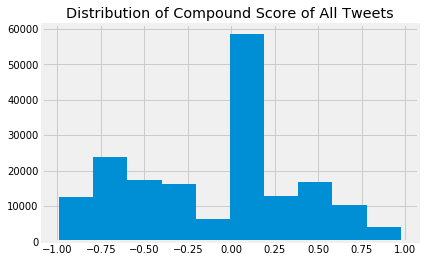

In [47]:
merged_df_2.hist(column='compound')
plt.title('Distribution of Compound Score of All Tweets')

## Distribution of compound score of tweets per topic

In [17]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    #print(x)
    return(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3cccdb00>,
      dtype=object)

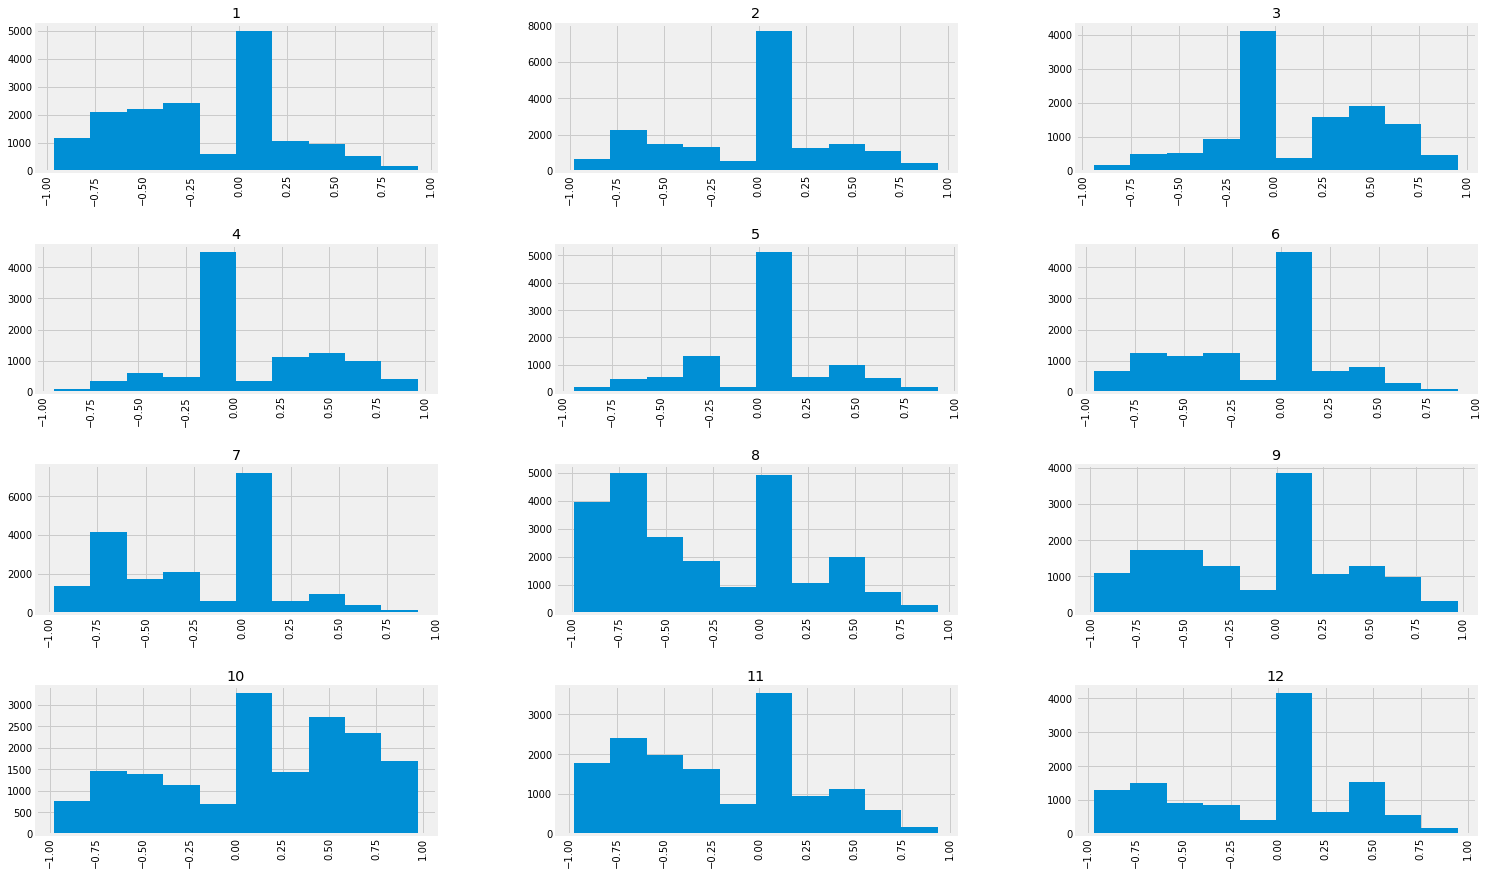

In [54]:
merged_df_2['compound'].hist(by=merged_df_2['Dominant_Topic'], figsize=(25,15))


## Time series of  sentiment scores of tweets per day per topic

In [20]:
sentiments_df = merged_df.copy()

In [21]:
# pivoted_df = pd.pivot_table(sentiments_df, index = ['date', 'Dominant_Topic'], values="compound")
pivoted_df = pd.pivot_table(sentiments_df, index= 'date', columns= 'Dominant_Topic', values= "compound")

pivoted_df.head()

Dominant_Topic,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2014-08-09,nan,nan,nan,nan,nan,nan,-0.78,nan,0.25,nan,nan,nan
2014-08-10,-0.20,-0.09,0.12,0.11,-0.06,-0.27,-0.34,-0.36,-0.22,0.06,-0.28,-0.12
2014-08-11,-0.27,-0.12,0.03,0.02,-0.02,-0.26,-0.27,-0.36,-0.17,-0.01,-0.29,-0.12
2014-08-12,-0.18,-0.09,0.11,0.00,0.02,-0.23,-0.26,-0.34,-0.16,0.06,-0.23,-0.32
2014-08-13,-0.18,-0.05,0.13,0.04,0.05,-0.24,-0.27,-0.34,-0.16,0.05,-0.31,-0.16


Text(0, 0.5, 'compound score')

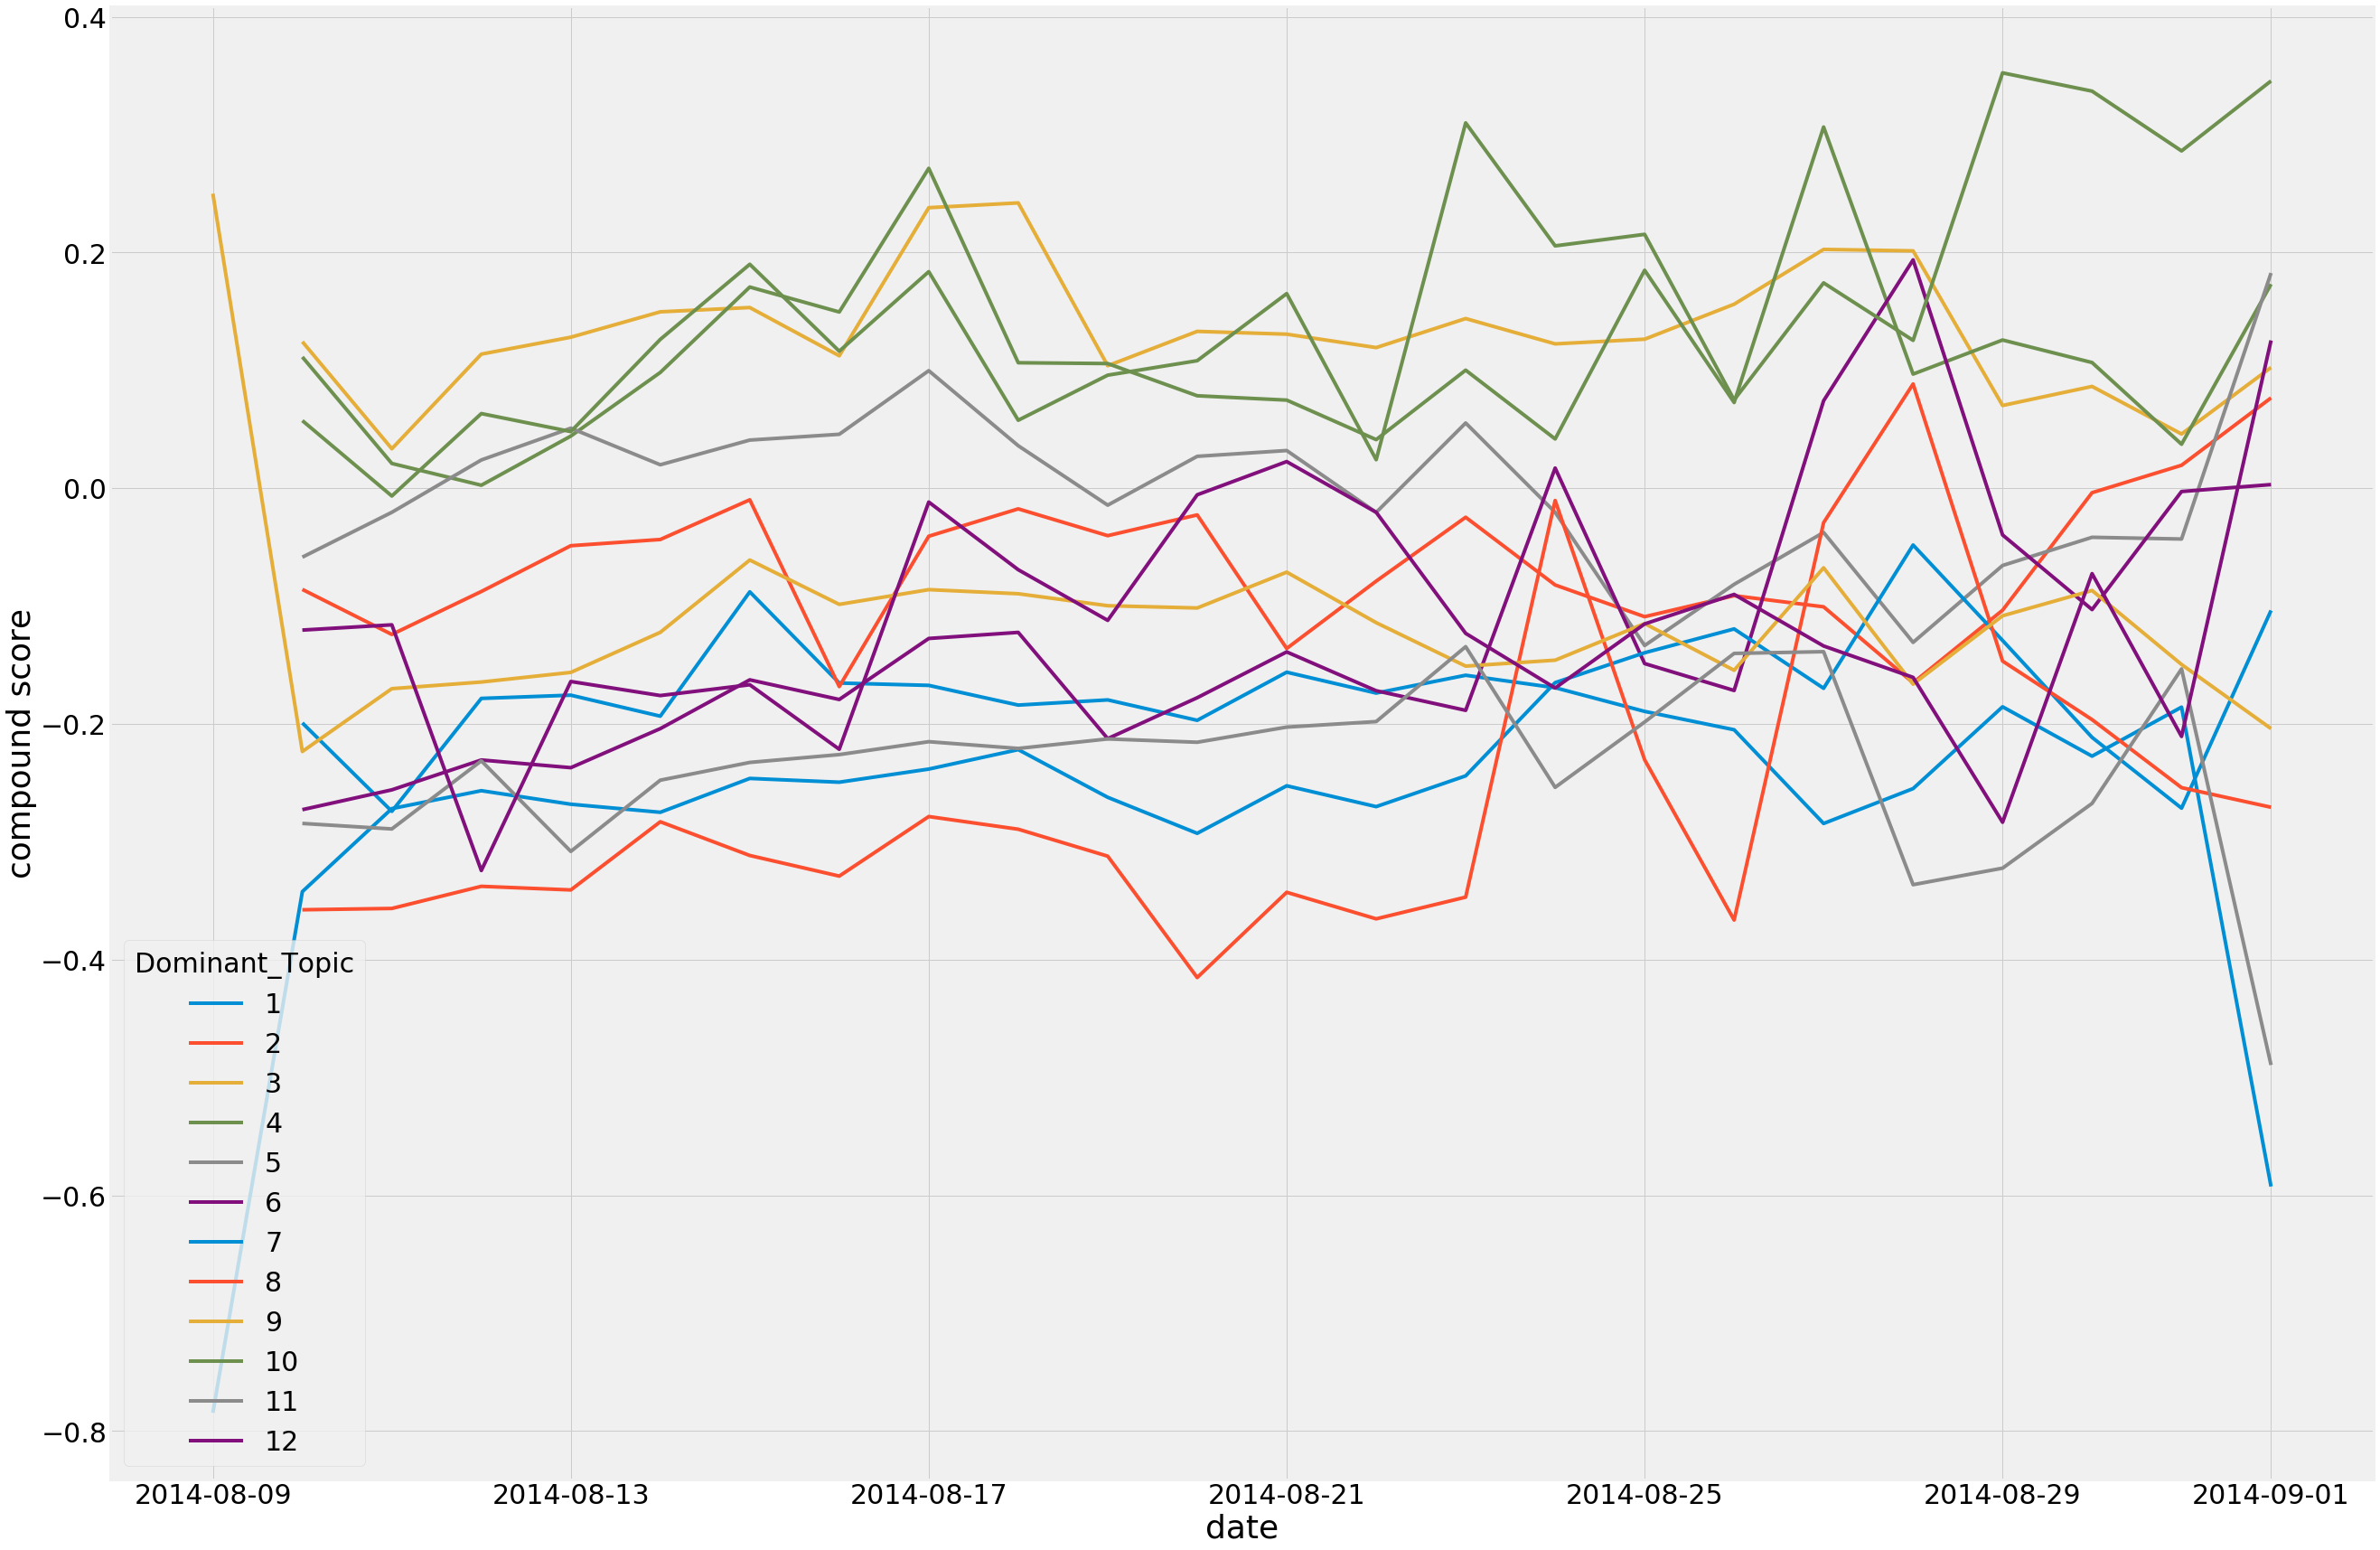

In [35]:

plt.rcParams["font.size"] = "30"
pivoted_df.plot(figsize=(40,30))
plt.ylabel("compound score")

Text(0.5, 1.0, 'Topics over time')

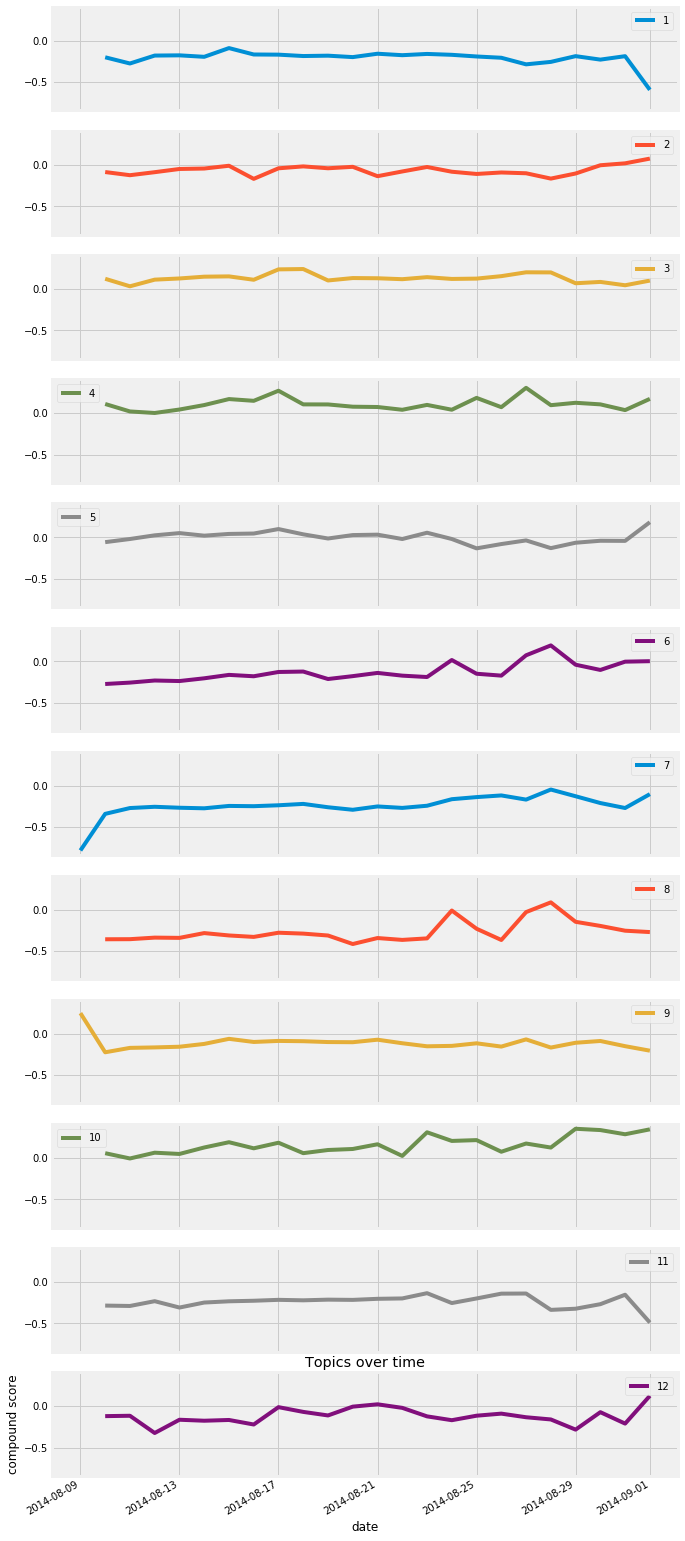

In [38]:
plt.rcParams["font.size"] = "10"
pivoted_df.plot(subplots=True,figsize=(10,30), sharey=True)
plt.ylabel("compound score")
plt.title('Topics over time')

## Time series of sentiment scores

Note:

   Pos, Neg, neu are proportion of text that falls in each category

   Compound is a score between [-1, 1]

In [39]:
sentiments_df = sentiments_df.drop(['id','Topic_Perc_Contrib'],axis=1)

In [40]:
sentiments_df_by_day = sentiments_df.groupby(sentiments_df.created_at.dt.date).mean()

In [41]:
sentiments_df_scores_by_day = sentiments_df_by_day.drop('Dominant_Topic', axis = 1)
sentiments_df_scores_by_day.head()

,neg,neu,pos,compound
created_at,,,,
2014-08-09,0.16,0.76,0.07,-0.27
2014-08-10,0.14,0.79,0.07,-0.19
2014-08-11,0.15,0.77,0.08,-0.17
2014-08-12,0.14,0.78,0.08,-0.15
2014-08-13,0.13,0.80,0.07,-0.15


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a35a3ea58>,
      dtype=object)

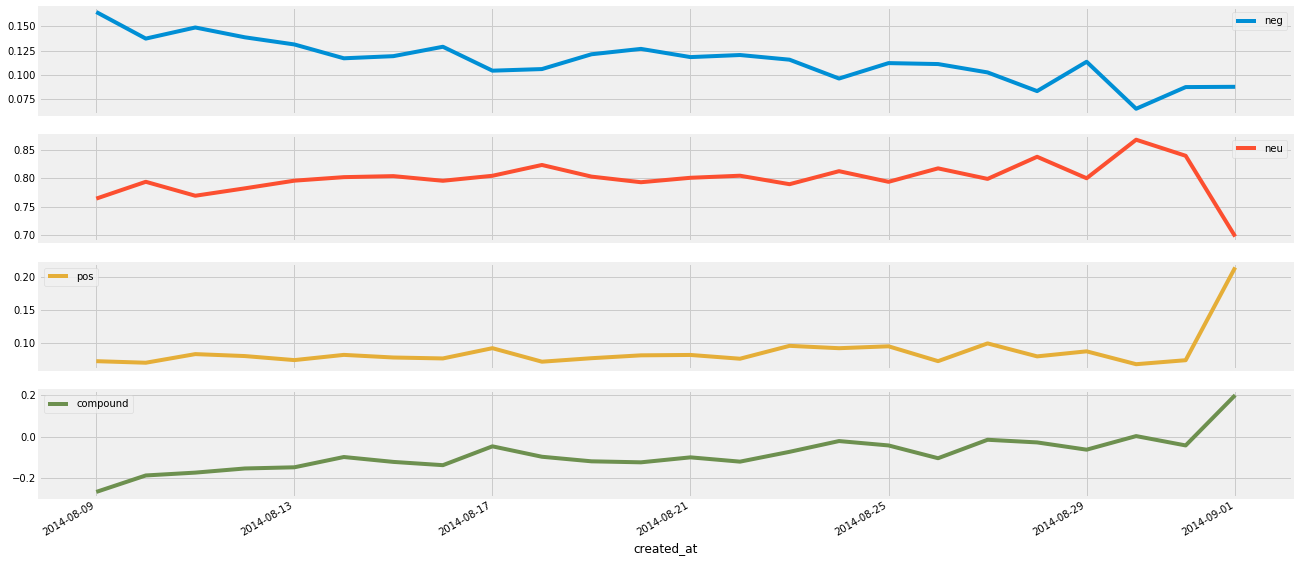

In [44]:
sentiments_df_scores_by_day.plot(figsize=(20,10), subplots=True)